# 비지도학습_군집분석
* 정답지가 없는 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 계층적 군집
* 비지도학습
* 데이터가 적을 때 사용
* 거리 계산 지표 : 유크리드, 맨하탄, 코사인 유사도 
* 계층적 군집 5가지
    1) 단일연결법(single linkage) / 최단연결법 : 군집과 군집 사이에서 가장 가까운 데이터를 기준으로 묶음
    2) 완전연결법(complete linkage) / 최장연결법 : 군집과 군집 사이에서 가장 먼 데이터를 기준으로 묶음
    3) 평균연결법(average linkage) : 군집과 군집 사이의 모든 데이터의 평균 데이터로 계산(이상치에 덜 민감)
    4) 중심연결법(centroid linkage) : 군집과 중심점 사이의 거리를 거리로 측정한 방법, 계산이 빠름
    5) 와드연결법(ward linkage) : 군집 내 오차가 최소가 되는 데이터로 계산, 군집 내 분산이 최소, 조밀한 군집
* 계층적 군집의 시각화는 **덴드로그램**으로 함

In [6]:
import scipy.cluster.hierarchy as shc

In [8]:
data = pd.get_dummies(data, drop_first=True)
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [9]:
data2 = data.copy()

In [10]:
data = data.drop(['CustomerID'], axis=1)
data

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


## 단일연결법 single linkage

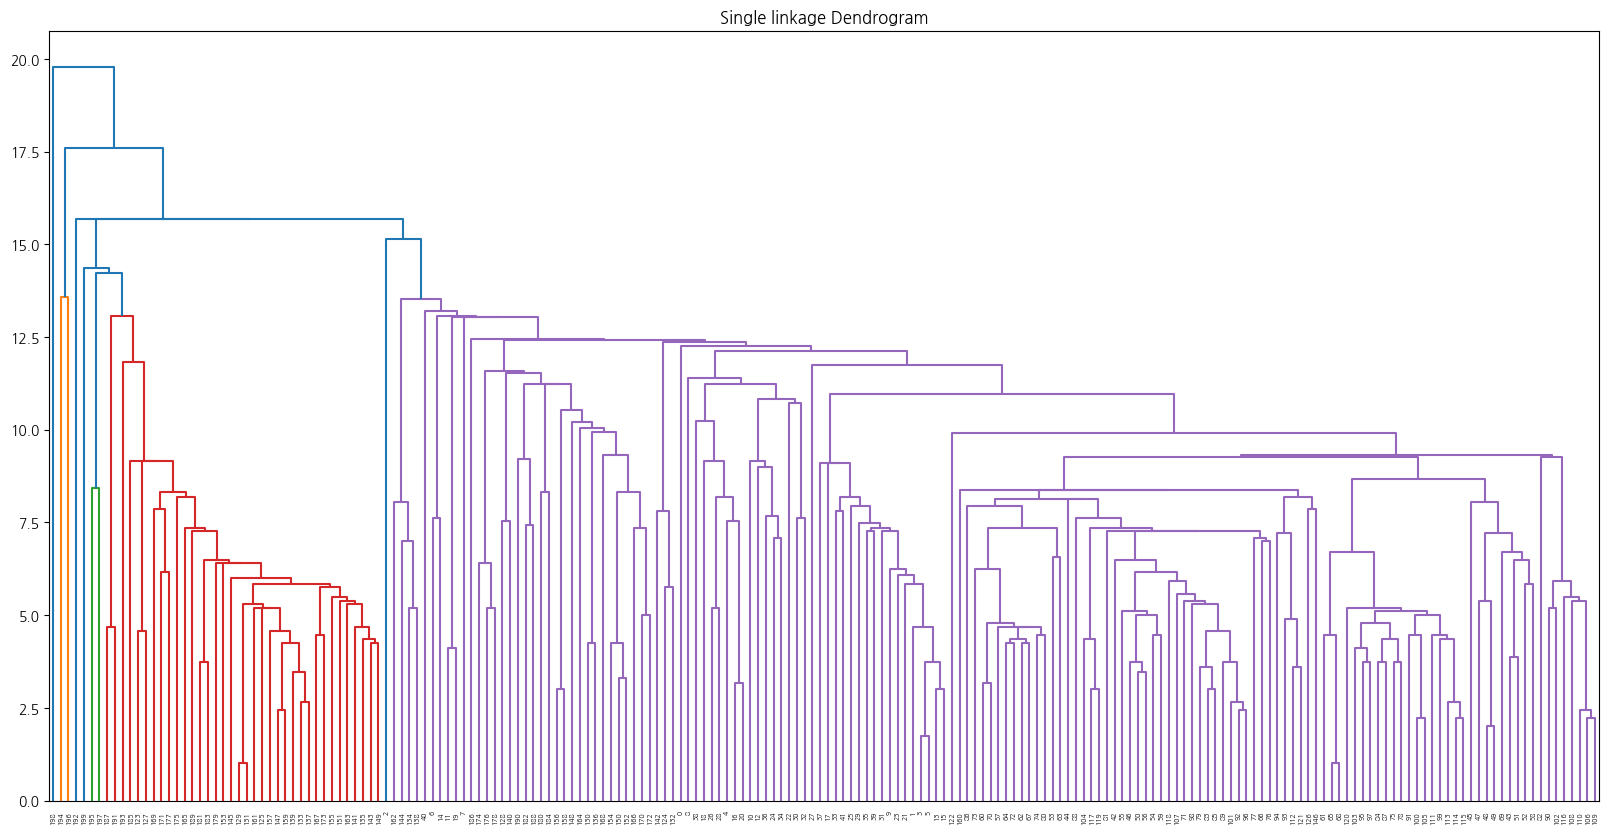

In [11]:
plt.figure(figsize=(20,10))
plt.title('Single linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='single'))
plt.show()

## 완전연결법 complete linkage

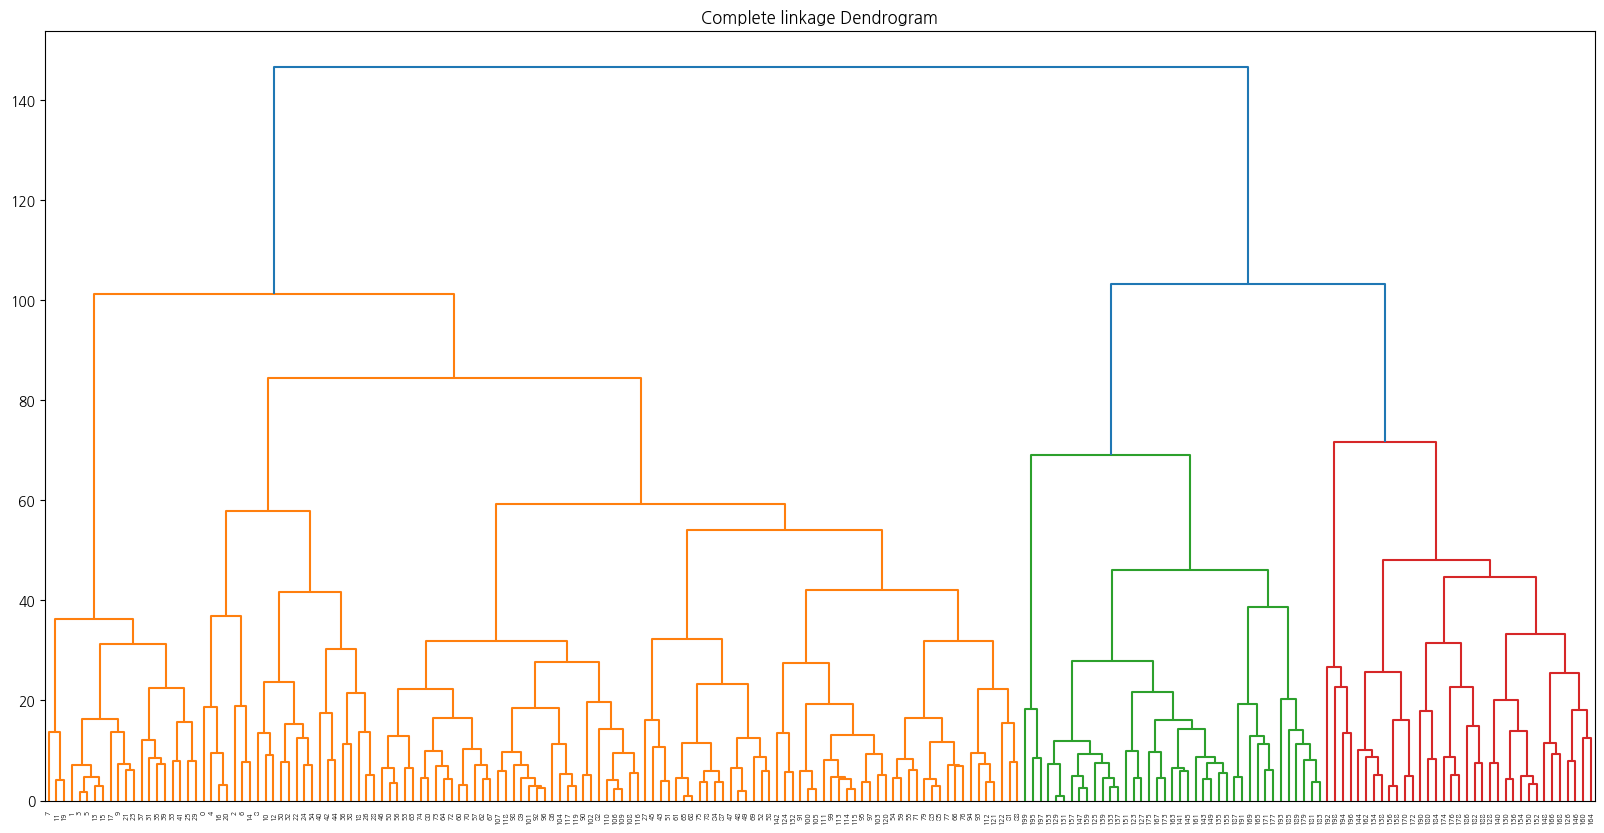

In [12]:
plt.figure(figsize=(20,10))
plt.title('Complete linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='complete'))
plt.show()

## 평균연결법 average linkage

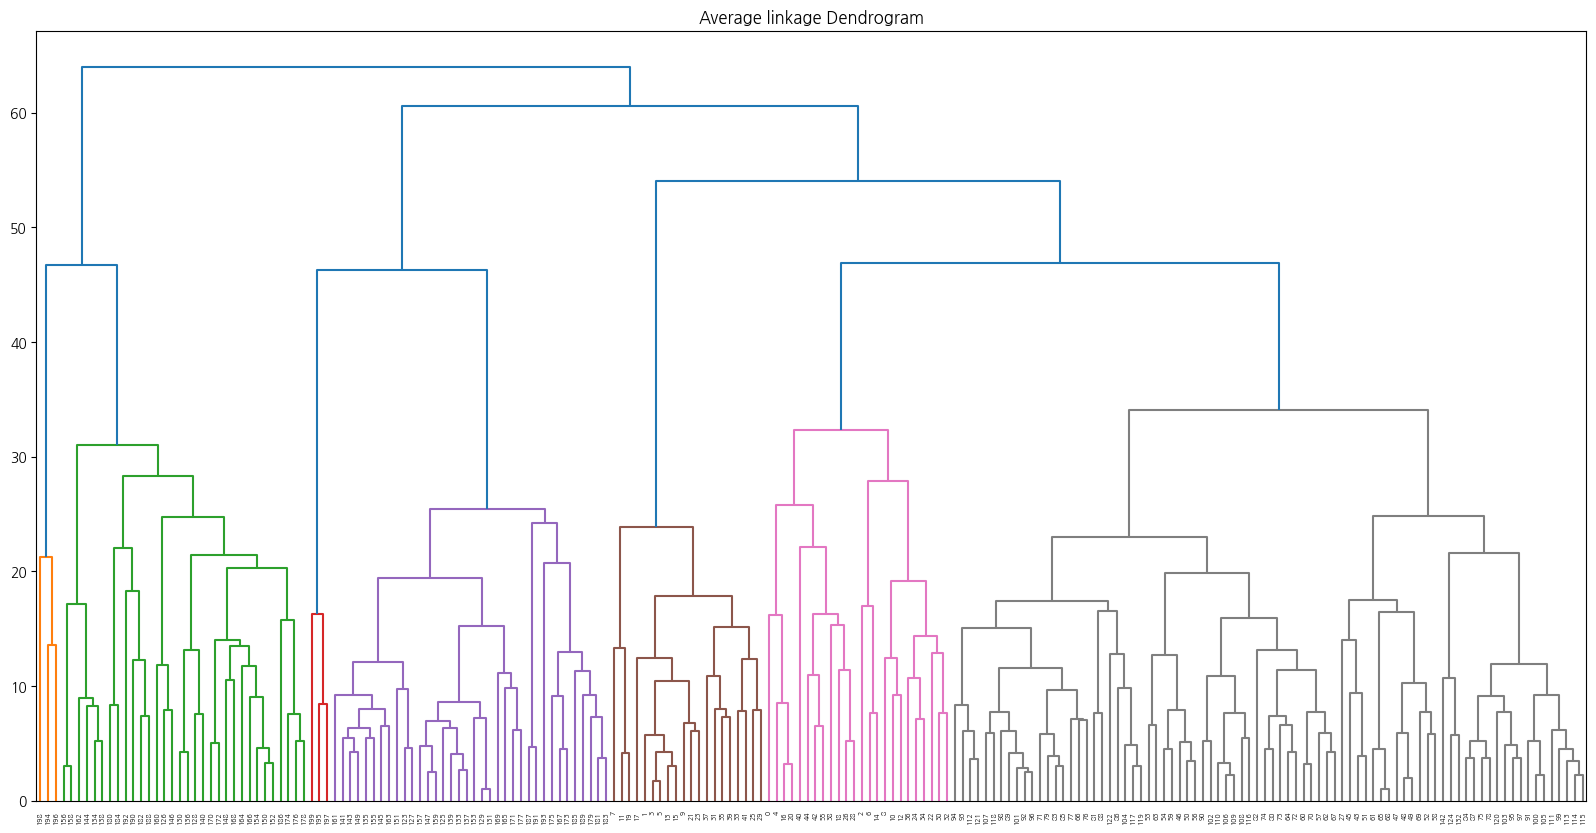

In [13]:
plt.figure(figsize=(20,10))
plt.title('Average linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='average'))
plt.show()

## 중심연결법 centroid linkage

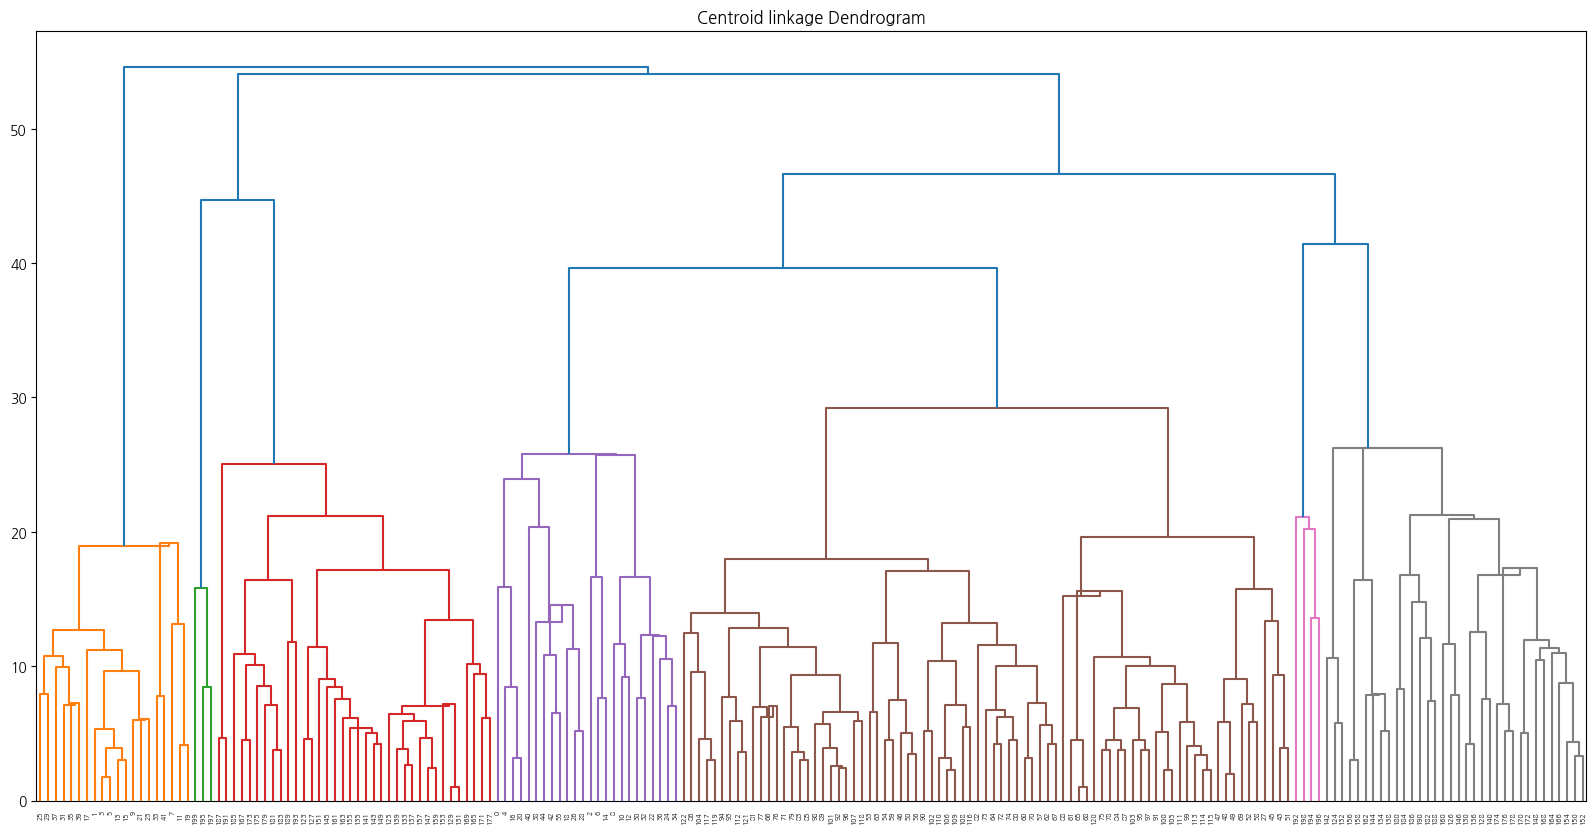

In [15]:
plt.figure(figsize=(20,10))
plt.title('Centroid linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='centroid'))
plt.show()

## 와드연결법 ward linkage

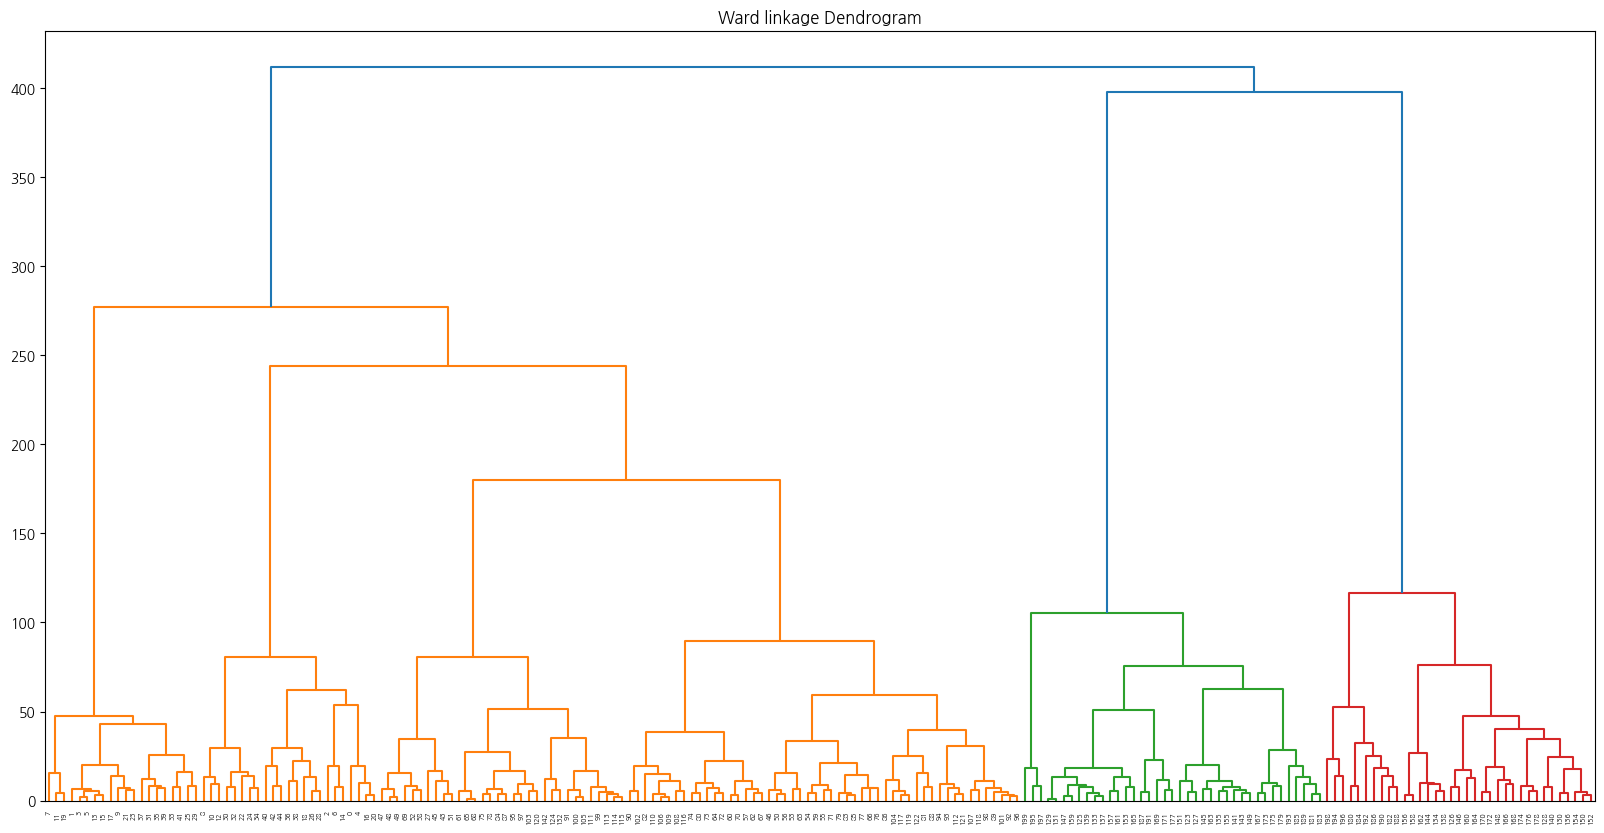

In [16]:
plt.figure(figsize=(20,10))
plt.title('Ward linkage Dendrogram')
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
result = single.fit_predict(data)
data2['single'] = result
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single
0,1,19,15,39,True,0
1,2,21,15,81,True,0
2,3,20,16,6,False,0
3,4,23,16,77,False,0
4,5,31,17,40,False,0
...,...,...,...,...,...,...
195,196,35,120,79,False,0
196,197,45,126,28,False,2
197,198,32,126,74,True,0
198,199,32,137,18,True,1


In [20]:
average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
result = average.fit_predict(data)
data2['average'] = result
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average
0,1,19,15,39,True,0,0
1,2,21,15,81,True,0,0
2,3,20,16,6,False,0,0
3,4,23,16,77,False,0,0
4,5,31,17,40,False,0,0
...,...,...,...,...,...,...,...
195,196,35,120,79,False,0,2
196,197,45,126,28,False,2,1
197,198,32,126,74,True,0,2
198,199,32,137,18,True,1,1


In [21]:
ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
result = ward.fit_predict(data)
data2['ward'] = result
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
0,1,19,15,39,True,0,0,0
1,2,21,15,81,True,0,0,0
2,3,20,16,6,False,0,0,0
3,4,23,16,77,False,0,0,0
4,5,31,17,40,False,0,0,0
...,...,...,...,...,...,...,...,...
195,196,35,120,79,False,0,2,2
196,197,45,126,28,False,2,1,1
197,198,32,126,74,True,0,2,2
198,199,32,137,18,True,1,1,1


# 비계층적 군집
* 데이터 수가 많을 때 사용
* 대표적 : k-means(K 평균 군집)
    * 거리를 기반으로 군집을 형성
    * 이상치에 민감함 (∵평균이기때문에)
* StandardScaler를 사용 / 데이터에 이상치가 있으면 RobustScaler 사용
* 평균이 아닌 중앙값을 이용해서 군집 형성

In [25]:
data = pd.read_csv('./data/06고객이탈예측.csv', encoding='cp949')

In [59]:
data2 = data.copy()

In [31]:
data.head(3)

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

In [29]:
data.isna().sum()

회원ID          0
성별            0
고연령           0
배우자           0
피부양자          0
가입기간          0
전화서비스         0
2회선이상         0
인터넷서비스        0
온라인보안         0
온라인백업         0
기기보호서비스       0
기술지원          0
스트리밍TV        0
스트리밍Movies    0
약정옵션          0
온라인고지서        0
지불수단          0
월요금           0
합산요금          0
이탈여부          0
dtype: int64

In [50]:
data.describe()

,고연령,가입기간,월요금,합산요금
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [47]:
data['합산요금'] = data['합산요금'].replace('', 0).replace(' ', 0).astype(float)

In [48]:
num_cols = data[['가입기간', '월요금', '합산요금']]
cat_cols = data.drop(['가입기간', '월요금', '합산요금'], axis=1)

In [58]:
cat_cols

,회원ID,성별,고연령,배우자,피부양자,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,이탈여부
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()
ss_cols = ss.fit_transform(num_cols)
ss_cols = pd.DataFrame(ss_cols, columns=num_cols.columns, index=num_cols.index)
ss_cols

,가입기간,월요금,합산요금
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [53]:
ss_data = pd.concat([ss_cols, cat_cols], axis=1)

In [54]:
ss_data

,가입기간,월요금,합산요금,회원ID,성별,고연령,배우자,피부양자,전화서비스,2회선이상,...,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,이탈여부
0,-1.277445,-1.160323,-0.992611,7590-VHVEG,Female,0,Yes,No,No,No phone service,...,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0.066327,-0.259629,-0.172165,5575-GNVDE,Male,0,No,No,Yes,No,...,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-1.236724,-0.362660,-0.958066,3668-QPYBK,Male,0,No,No,Yes,No,...,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0.514251,-0.746535,-0.193672,7795-CFOCW,Male,0,No,No,No,No phone service,...,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,-1.236724,0.197365,-0.938874,9237-HQITU,Female,0,No,No,Yes,No,...,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.127605,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,...,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,1.613701,1.277533,2.242606,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,-0.870241,-1.168632,-0.852932,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,...,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,-1.155283,0.320338,-0.870513,8361-LTMKD,Male,1,Yes,No,Yes,Yes,...,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [55]:
ss_data = pd.get_dummies(ss_data, drop_first=True)

## k-means로 군집 분석하기

In [56]:
from sklearn.cluster import KMeans

In [60]:
km = KMeans(random_state=42)
km.fit(ss_data)
result = km.labels_
data2['cluster'] = result
data2

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,5


In [62]:
data2.loc[data2['cluster']==0, '이탈여부'].value_counts()

이탈여부
No     697
Yes     70
Name: count, dtype: int64

In [63]:
km = KMeans(random_state=42, n_clusters=3)
km.fit(ss_data)
result = km.labels_
data2['cluster'] = result
data2

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,2
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


# 군집의 최적 개수 정하기
1) elbow method
2) 실루엣 지수

#### 군집분석의 응집도
* 요소들이 얼마나 모여있는지 판단하는 지표
* inertia_ 값이 작을수록 군집이 잘 형성됨
### 1) elbow method
* intertia_(응집도)를 출력하고 시각화한 뒤 응집도의 감소폭이 급격한 변화가 시작되는 지점을 최적 군집의 수로 채택하는 방법

In [64]:
print(km.inertia_)

39033.069738711325


In [65]:
inertia = []
for i in range(1,21):
    km = KMeans(random_state=42, n_clusters=i)
    km.fit(ss_data)
    inertia.append(km.inertia_)

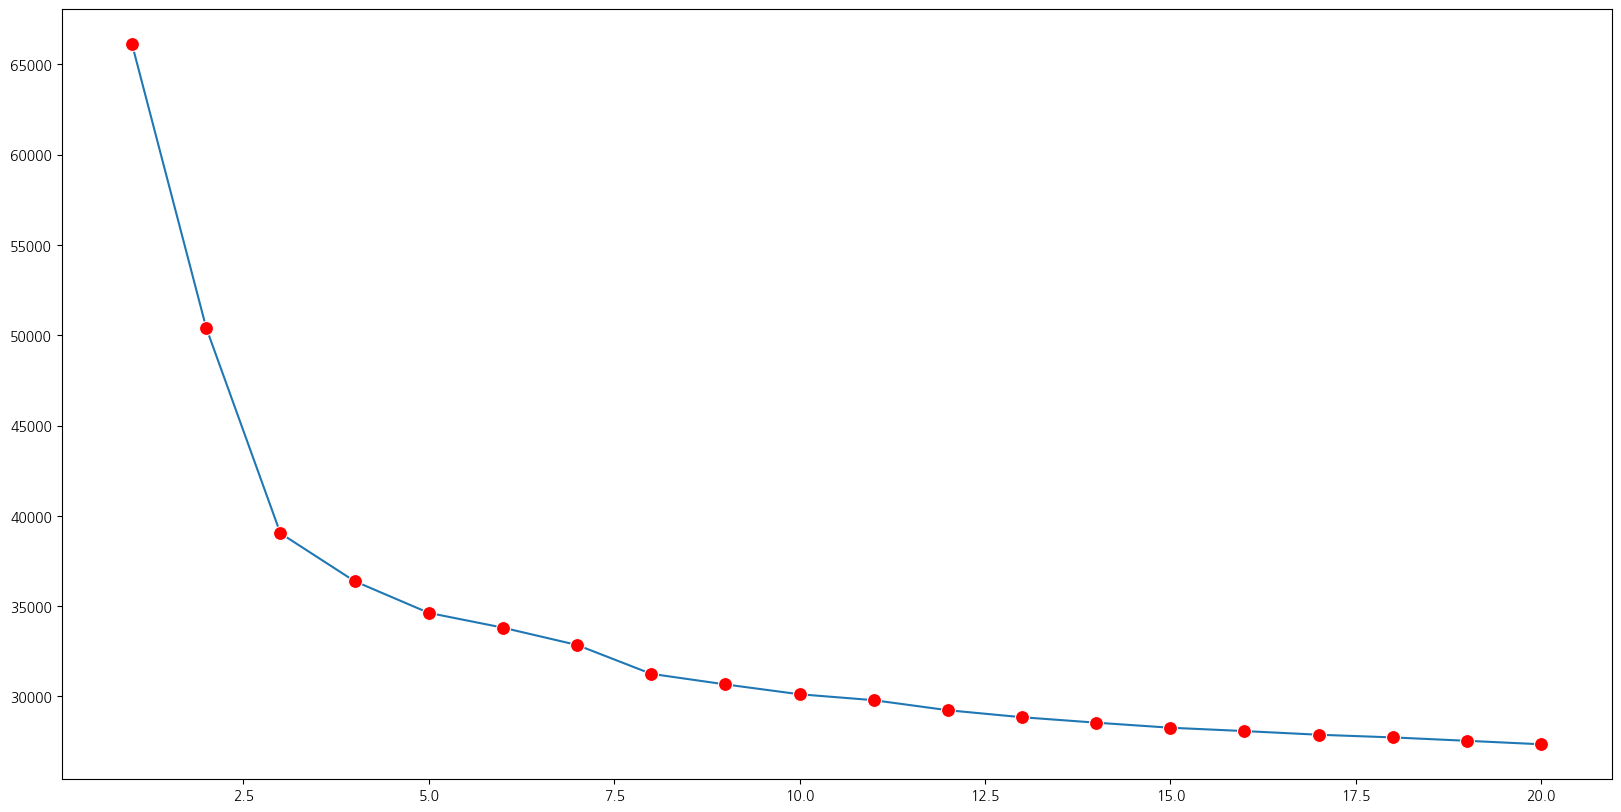

In [69]:
plt.figure(figsize=(20,10))
sns.lineplot(x=range(1,21), y=inertia, marker='o', markersize=10, markerfacecolor='Red')
plt.show()

### 2) 실루엣 지수
* 최소 2개 이상의 군집이 필요
* 실루엣 점수가 가장 높은 클러스터 개수가 최적 군집 개수 (1에 가까울수록 좋음)

In [70]:
from sklearn.metrics import silhouette_score

In [73]:
sil_score = []
for i in range(2, 21):
    km2 = KMeans(random_state=42, n_clusters=i)
    km2.fit(ss_data)
    labels = km2.labels_
    sil_score.append(silhouette_score(ss_data, labels))

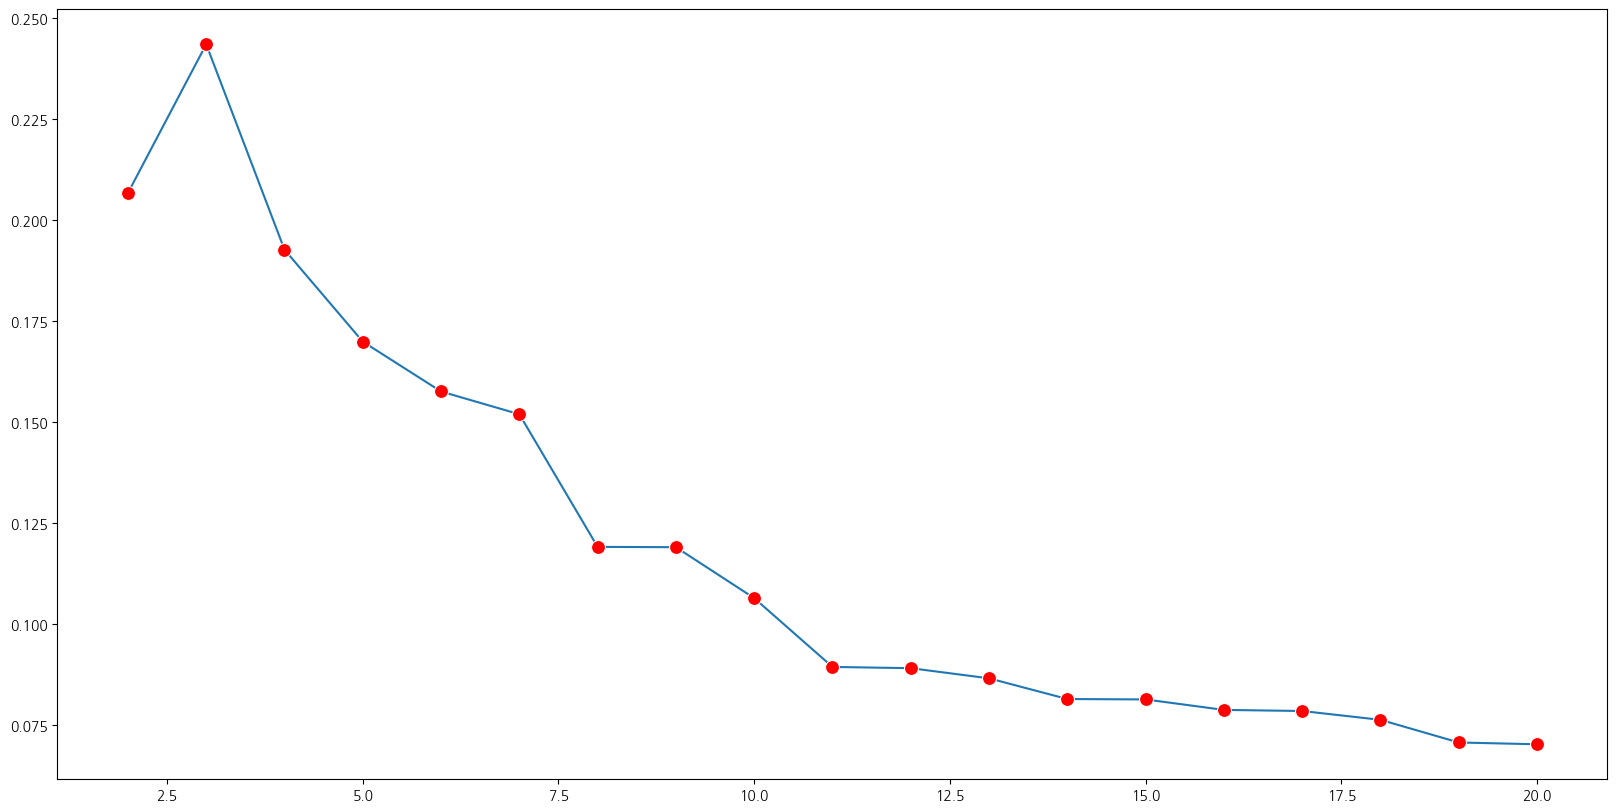

In [74]:
plt.figure(figsize=(20,10))
sns.lineplot(x=range(2,21), y=sil_score, marker='o', markersize=10, markerfacecolor='Red')
plt.show()